# X-ray emission spectrscopy (XES)


In this notebook, you will use emission data measured on Cr<sub>2</sub>O<sub>3</sub>. The first steps are the same as in the case of the XAS data reduction, i.e. locate the data on disk and visualize it using an external program. The particularity of this data reduction, is that the final spectrum will be reconstructed from three scans performed using different energy steps.

<figure>
  <img src="assets/xes.png" alt="XAS" style="width:60%">
  <figcaption style="text-align: center; font-style: italic">J.K. Kowalska et al., Israel Journal of Chemistry 56, 803 (2016).</figcaption>
</figure>

## Import the required packages and set up logging

In [1]:
%matplotlib notebook

import sys
import logging

import numpy as np
import matplotlib.pyplot as plt

from daxs.measurements import Source, Xes
from daxs.utils import merge_measurements

logging.basicConfig(level=logging.INFO, stream=sys.stdout)
logging.getLogger("daxs").setLevel(logging.INFO)

## Define the data source and create the measurement

In [2]:
filename = "experimental_data/ihch1515/id26/Cr2O3_new/Cr2O3_new_0003/Cr2O3_new_0003.h5"
scan_id = "4"
source = Source(filename=filename, inclusions=scan_id)

counters = {"x": "xes_en", "signal": "det_dtc_apd", "monitor": "I02"}
measurement = Xes(source, counters)

## Plot the reduced data

<IPython.core.display.Javascript object>


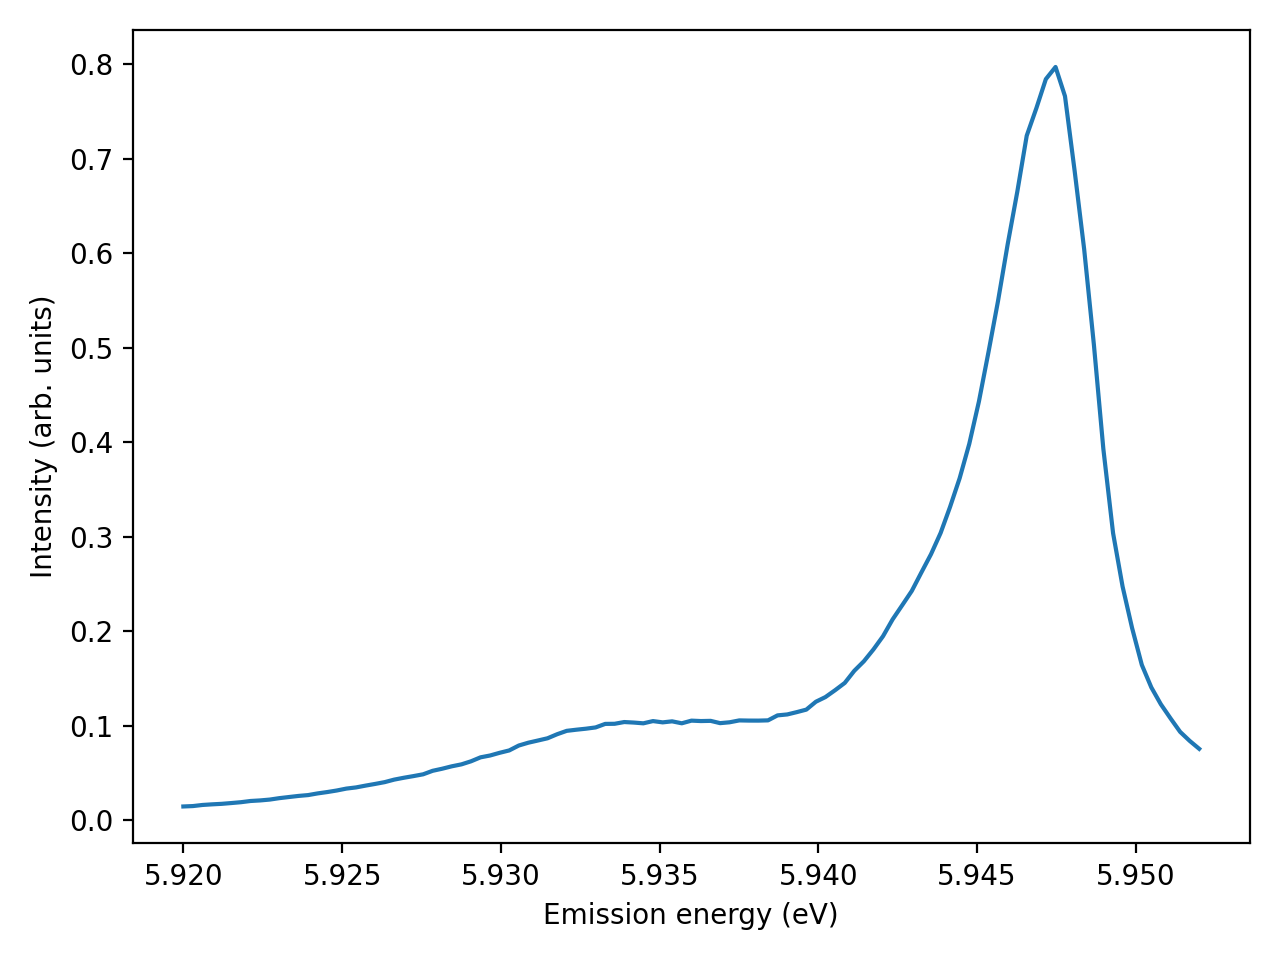

In [3]:
fig, ax = plt.subplots()

ax.plot(measurement.x, measurement.signal)

ax.set_xlabel("Emission energy (eV)")
ax.set_ylabel("Intensity (arb. units)")

plt.tight_layout()

## Load data from the three measurements and accumulate them into a list

In [4]:
measurements = []

scan_ids = ["4", "5", "6"]

for scan_id in scan_ids:
    source = Source(filename, scan_id)
    measurement = Xes(source, counters)
    measurements.append(measurement)

In [5]:
measurements

## Plot the three measurements

<IPython.core.display.Javascript object>


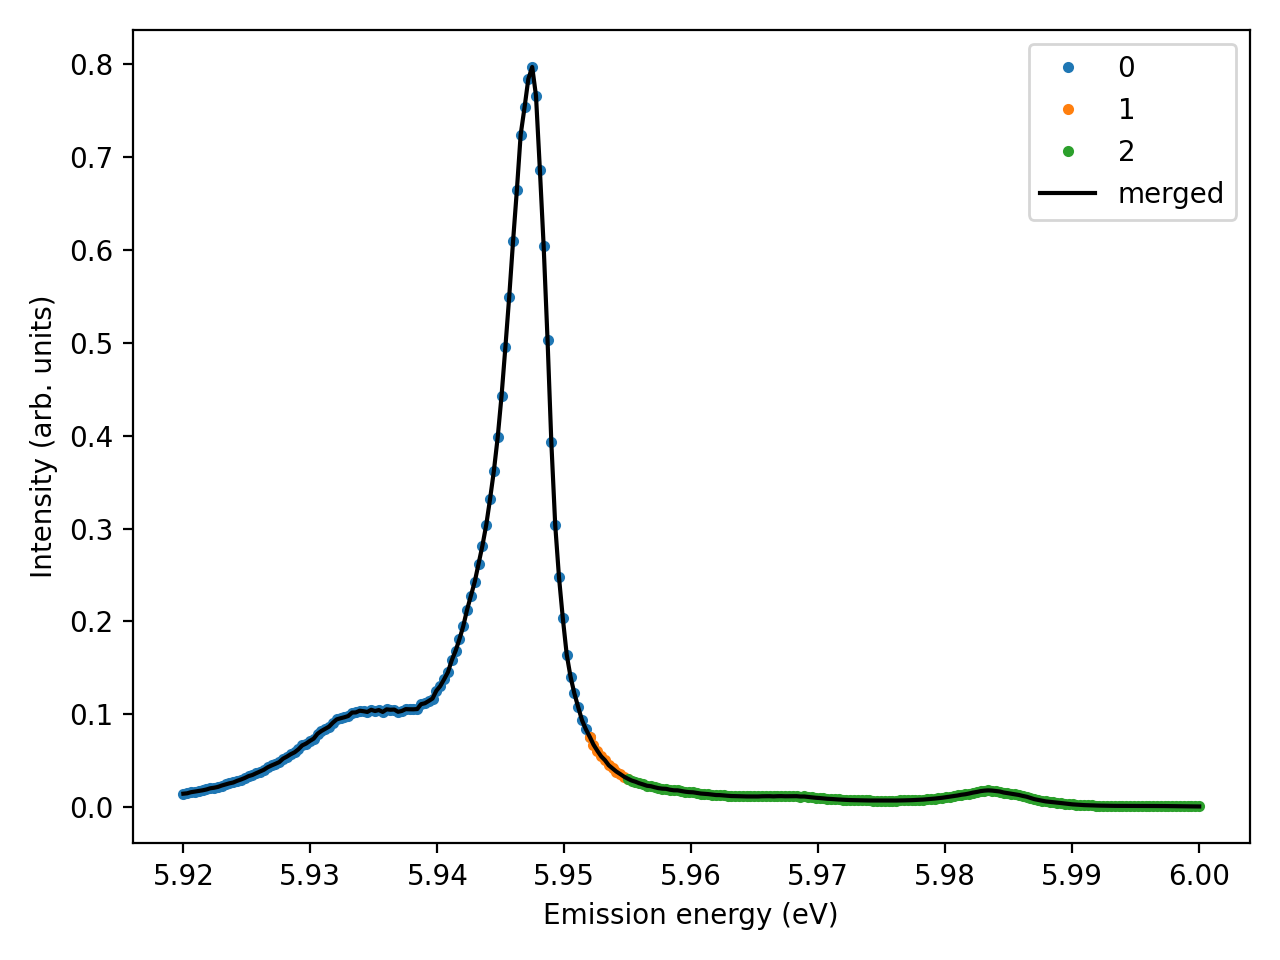

In [6]:
fig, ax = plt.subplots()

for i, measurement in enumerate(measurements):
    ax.plot(measurement.x, measurement.signal, ".", label=f"{i}")

ax.set_xlabel("Emission energy (eV)")
ax.set_ylabel("Intensity (arb. units)")

plt.tight_layout()

## Merge the measurements and plot the resulting spectrum

In [7]:
merge_measurements?

In [8]:
x, y = merge_measurements(measurements)

ax.plot(x, y, "k-", label="merged")
ax.legend()

INFO:daxs.utils:Removing indices [106] from measurement 0.
INFO:daxs.utils:Measurements 0 and 1 overlap.
INFO:daxs.utils:Measurements 1 and 2 overlap.
INFO:daxs.utils:Removing indices [0] from measurement 2.


## Plot the data with log scaling on the Y-axis

<IPython.core.display.Javascript object>


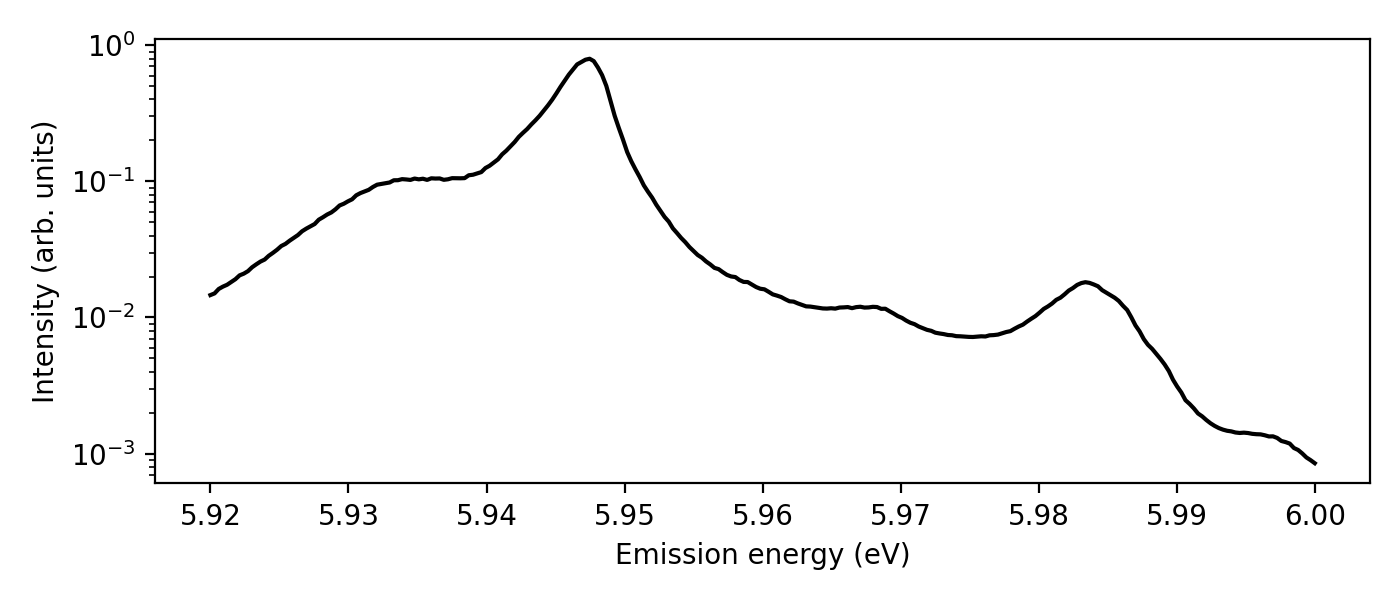

In [9]:
fig, ax = plt.subplots(figsize=(7, 3))

ax.semilogy(x, y, "k-", label="merged")    
ax.set_xlabel("Emission energy (eV)")
ax.set_ylabel("Intensity (arb. units)")

plt.tight_layout()

## Background subtraction for the valence-to-core (vtc) XES

<figure>
  <img src="assets/xes_semilogy.png" alt="XES semilog Y-axis" style="width:60%">
  <figcaption style="text-align: center; font-style: italic">E. Gallo and P. Glatzel, Advanced Materials 26, 7730 (2014).</figcaption>
</figure>